In [36]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel.data import PanelData
from linearmodels.panel import PanelOLS, PooledOLS, RandomEffects, compare
import matplotlib.pyplot as plt
from plot_result import plot_result

In [38]:
df=pd.read_csv("../../data/merged/len4_ndb_agg_DropNever.csv",encoding="shift-jis",index_col=0)

In [39]:
df=df.loc[df["総計"]>0]
df=df.loc[df["revenue"]>0]
df["log_quantity"]=np.log(df["総計"])
df["log_revenue"]=np.log(df["revenue"])
df_generic=df.copy()
df_branded=df.copy()
df_branded=df_branded.loc[df_branded["後発品区分"]==0]
df_generic=df_generic.loc[df_generic["後発品区分"]==1]
df_branded=df_branded.set_index(["id","year"])
df_generic=df_generic.set_index(["id","year"])
df=df.set_index(["id","year"])
df_branded=PanelData(df_branded,convert_dummies=False)
df_generic=PanelData(df_generic,convert_dummies=False)
df=PanelData(df,convert_dummies=False)

                                Parameter Estimates                                
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
elasped_m7         -0.2302     0.1607    -1.4331     0.1524     -0.5458      0.0853
elasped_m6         -0.1951     0.0869    -2.2439     0.0252     -0.3658     -0.0243
elasped_m5         -0.2238     0.1026    -2.1810     0.0296     -0.4254     -0.0223
elasped_m4         -0.1546     0.0586    -2.6377     0.0086     -0.2696     -0.0395
elasped_m3         -0.1351     0.0465    -2.9056     0.0038     -0.2264     -0.0438
elasped_m2         -0.1172     0.0647    -1.8122     0.0705     -0.2443      0.0098
elasped_0          -0.1164     0.1096    -1.0615     0.2889     -0.3317      0.0989
elasped_1          -0.0132     0.0665    -0.1980     0.8431     -0.1437      0.1174
elasped_2           0.0388     0.1013     0.3829     0.7020     -0.1602     

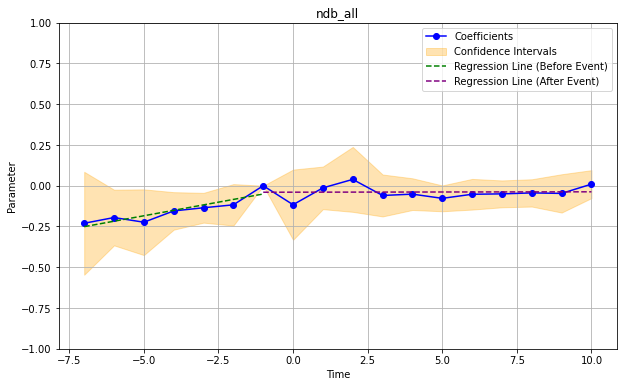

In [40]:
# all data
formula="log_quantity~ elasped_m7+elasped_m6+elasped_m5+elasped_m4+elasped_m3+elasped_m2+elasped_0+elasped_1+elasped_2+elasped_3+elasped_4+elasped_5+elasped_6+elasped_7+elasped_8+elasped_9+elasped_10+TimeEffects+EntityEffects"

# till elasped_20
# formula="log_quantity~ elasped_m7+elasped_m6+elasped_m5+elasped_m4+elasped_m3+elasped_m2+elasped_0+elasped_1+elasped_2+elasped_3+elasped_4+elasped_5+elasped_6+elasped_7+elasped_8+elasped_9+elasped_10+elasped_11+elasped_12+elasped_13+elasped_14+elasped_15+TimeEffects+EntityEffects"


# add generic indicator
formula+="+後発品区分"

# add generic per
formula+="+generic_per"
# generic_share_r
formula+=" + generic_share_r"
# generic_share_q
formula+=" + generic_share_q"

mod_fe=PanelOLS.from_formula(formula, data=df,check_rank=False,drop_absorbed=True)
res_fe=mod_fe.fit(cov_type='clustered', cluster_entity=True)
print(res_fe.summary.tables[1])
# print(res_fe.summary.tables[0])
# print(res_fe)
# plot_result(res_fe,file_name="ndb_all",title="ndb_all",start_from=1,period=15)
plot_result(res_fe,file_name="ndb_all",title="ndb_all")

                                Parameter Estimates                                
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
generic_per         0.2576     0.0037     69.659     0.0000      0.2503      0.2649
elasped_m7         -0.2986     0.2404    -1.2419     0.2154     -0.7721      0.1749
elasped_m6         -0.2264     0.1134    -1.9964     0.0470     -0.4498     -0.0031
elasped_m5         -0.4636     0.1550    -2.9912     0.0031     -0.7689     -0.1584
elasped_m4         -0.2395     0.0882    -2.7142     0.0071     -0.4132     -0.0657
elasped_m3         -0.1931     0.0639    -3.0243     0.0027     -0.3189     -0.0674
elasped_m2         -0.2046     0.0727    -2.8160     0.0052     -0.3477     -0.0615
elasped_0          -0.1125     0.1233    -0.9120     0.3626     -0.3554      0.1304
elasped_1           0.0981     0.0778     1.2605     0.2086     -0.0552     

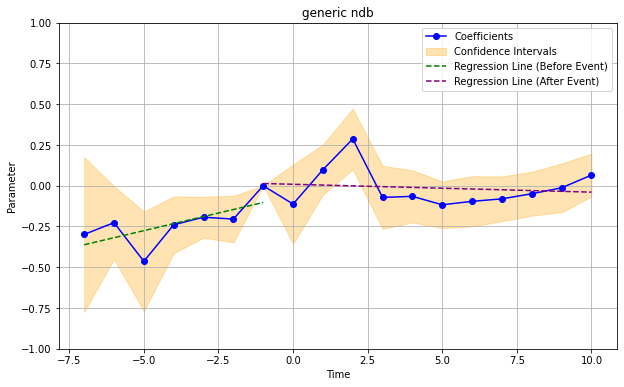

In [41]:
# generic data
formula="log_quantity~generic_per+elasped_m7+elasped_m6+elasped_m5+elasped_m4+elasped_m3+elasped_m2+elasped_0+elasped_1+elasped_2+elasped_3+elasped_4+elasped_5+elasped_6+elasped_7+elasped_8+elasped_9+elasped_10+TimeEffects+EntityEffects"

# till elasped_20
# formula="log_quantity~ elasped_m7+elasped_m6+elasped_m5+elasped_m4+elasped_m3+elasped_m2+elasped_0+elasped_1+elasped_2+elasped_3+elasped_4+elasped_5+elasped_6+elasped_7+elasped_8+elasped_9+elasped_10+elasped_11+elasped_12+elasped_13+elasped_14+elasped_15+TimeEffects+EntityEffects"

# add generic_per
formula+="+generic_per"
# generic_share_r
formula+=" + generic_share_r"
# generic_share_q
formula+=" + generic_share_q"

mod_fe=PanelOLS.from_formula(formula, data=df_generic,check_rank=False,drop_absorbed=True)
res_fe=mod_fe.fit(cov_type='clustered', cluster_entity=True)
print(res_fe.summary.tables[1])
# print(res_fe.summary.tables[0])
# print(res_fe)
# plot_result(res_fe,file_name="ndb_generic",title="generic ndb",start_from=1,period=15)
plot_result(res_fe,file_name="ndb_generic",title="generic ndb",start_from=2)

                          PanelOLS Estimation Summary                           
Dep. Variable:           log_quantity   R-squared:                        0.2658
Estimator:                   PanelOLS   R-squared (Between):             -0.0586
No. Observations:                 343   R-squared (Within):              -134.99
Date:                Wed, Sep 06 2023   R-squared (Overall):             -2.0230
Time:                        22:28:31   Log-likelihood                    107.59
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      5.2211
Entities:                          43   P-value                           0.0000
Avg Obs:                       7.9767   Distribution:                  F(19,274)
Min Obs:                       7.0000                                           
Max Obs:                       8.0000   F-statistic (robust):          2.823e+08
                            

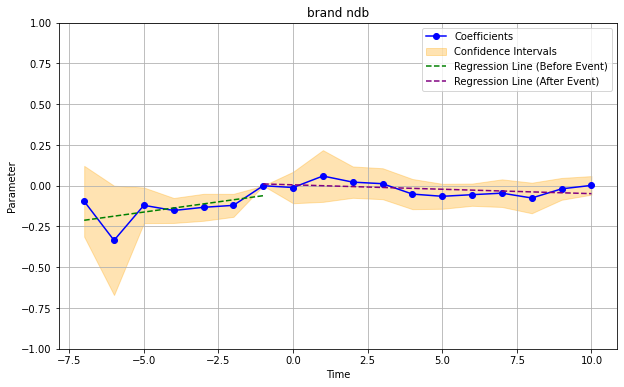

In [42]:
# branded data
formula="log_quantity~ elasped_m7+elasped_m6+elasped_m5+elasped_m4+elasped_m3+elasped_m2+elasped_0+elasped_1+elasped_2+elasped_3+elasped_4+elasped_5+elasped_6+elasped_7+elasped_8+elasped_9+elasped_10+TimeEffects+EntityEffects"

# till elasped_20
# formula="log_quantity~ elasped_m7+elasped_m6+elasped_m5+elasped_m4+elasped_m3+elasped_m2+elasped_0+elasped_1+elasped_2+elasped_3+elasped_4+elasped_5+elasped_6+elasped_7+elasped_8+elasped_9+elasped_10+elasped_11+elasped_12+elasped_13+elasped_14+elasped_15+TimeEffects+EntityEffects"
# add generic_per
formula+="+generic_per"
# generic_share_r
formula+=" + generic_share_r"
# generic_share_q
formula+=" + generic_share_q"


mod_fe=PanelOLS.from_formula(formula, data=df_branded,check_rank=False,drop_absorbed=True)
res_fe=mod_fe.fit(cov_type='clustered', cluster_entity=True)
# print(res_fe.summary.tables[1])
# print(res_fe.summary.tables[0])
print(res_fe)
# plot_result(res_fe,file_name="ndb_brand",title="brand ndb",start_from=1,period=15)
plot_result(res_fe,file_name="ndb_brand",title="brand ndb")
